In [1]:
import statsmodels.sandbox.stats.multicomp
import scipy.stats 
from scipy.stats import norm
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import pandas

In [4]:
import matplotlib.pyplot as plt

In [5]:
scipy.stats.combine_pvalues([0.1,0.2,0.3])[1]


0.11521621423478851

In [6]:
help(scipy.stats.combine_pvalues)


Help on function combine_pvalues in module scipy.stats.stats:

combine_pvalues(pvalues, method='fisher', weights=None)
    Methods for combining the p-values of independent tests bearing upon the
    same hypothesis.
    
    Parameters
    ----------
    pvalues : array_like, 1-D
        Array of p-values assumed to come from independent tests.
    method : {'fisher', 'stouffer'}, optional
        Name of method to use to combine p-values. The following methods are
        available:
    
        - "fisher": Fisher's method (Fisher's combined probability test),
          the default.
        - "stouffer": Stouffer's Z-score method.
    weights : array_like, 1-D, optional
        Optional array of weights used only for Stouffer's Z-score method.
    
    Returns
    -------
    statistic: float
        The statistic calculated by the specified method:
        - "fisher": The chi-squared statistic
        - "stouffer": The Z-score
    pval: float
        The combined p-value.
    
    N

In [7]:
statsmodels.sandbox.stats.multicomp.multipletests([0.05,0.05],method="fdr_bh")



(array([ True,  True], dtype=bool),
 array([ 0.05,  0.05]),
 0.025320565519103666,
 0.025)

In [8]:
t1t2ratiodata = pandas.read_csv('/Users/jritchie/data/garbage2/T1T2Ratio.cortex.gene_list.csv')

In [9]:
def num_positive(x):
    return sum([y > 0 for y in x])

In [10]:
count = t1t2ratiodata.iloc[1:,1:7].apply(num_positive,axis=1)

In [11]:
sum(count == 3)*1.0/len(count)

0.21921664206515395

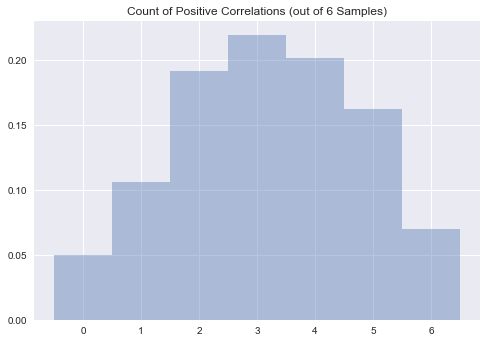

In [60]:
sns.distplot(count,bins=np.arange(0,8),kde=False,norm_hist=True)
plt.xticks(np.arange(0,7)+0.5,np.arange(0,7))
plt.title("Count of Positive Correlations (out of 6 Samples)")
plt.show()

In [13]:
plt.clf()

In [14]:
significant_count = t1t2ratiodata[t1t2ratiodata.adjusted_meta_p < 0.05].iloc[1:,1:7].apply(num_positive,axis=1)

In [73]:
significant_count.apply(lambda x: x in [4,5,6])

12       False
13       False
17        True
20       False
21       False
24        True
28       False
33        True
40       False
44        True
45        True
48        True
54       False
55        True
58        True
61       False
71        True
75       False
77       False
79        True
82        True
84       False
89       False
97       False
98       False
99       False
105      False
109      False
113       True
114       True
         ...  
28912    False
28927     True
28929    False
28934    False
28936    False
28944    False
28947     True
28962     True
28966    False
29017     True
29025    False
29028    False
29030    False
29045    False
29046    False
29050    False
29076    False
29079    False
29081    False
29082    False
29085    False
29096    False
29099     True
29102    False
29115     True
29118    False
29119    False
29127    False
29128     True
29130    False
dtype: bool

In [94]:
a = sum(significant_count == 3)*100.0/len(significant_count)
a

12.731729738011337

In [95]:
b = sum(significant_count.apply(lambda x: x in [0,1,2]))*100.0/len(significant_count)
b

48.276390378428069

In [96]:
c = sum(significant_count.apply(lambda x: x in [4,5,6]))*100.0/len(significant_count)
c

38.991879883560593

In [16]:
plt.xticks

<function matplotlib.pyplot.xticks>

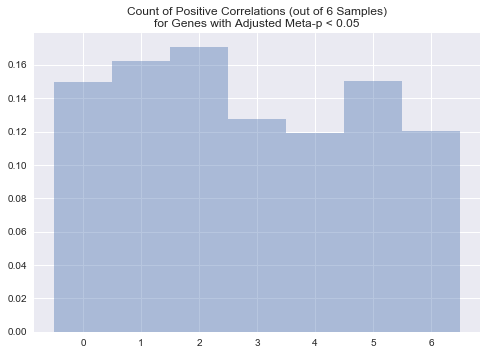

In [65]:
sns.distplot(significant_count,bins=np.arange(0,8),kde=False,norm_hist=True)
plt.xticks(np.arange(0,7)+0.5,np.arange(0,7))
plt.title("Count of Positive Correlations (out of 6 Samples)\nfor Genes with Adjusted Meta-p < 0.05")
plt.show()

In [56]:
len(t1t2ratiodata.iloc[1:,:])

29131

In [52]:
significant_ties = t1t2ratiodata[t1t2ratiodata.adjusted_meta_p < 0.05].iloc[1:,:][significant_count == 3]

In [55]:
significant_ties

,Unnamed: 0,correlation,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,raw,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,adjusted,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,raw_meta_p,adjusted_meta_p
12,AAAS,-0.003842,0.194822,0.126354,0.274499,-0.048555,-0.002528,0.937124,0.006213,0.032370,...,0.435617,9.531803e-01,0.962328,0.227529,0.210626,0.000555,0.773802,9.737032e-01,4.769583e-05,4.089067e-02
84,ABHD10,0.183515,0.064525,-0.003993,0.095833,-0.153367,-0.226725,0.000145,0.368913,0.946306,...,0.013297,9.512024e-08,0.003100,0.834795,0.985023,0.316357,0.281524,3.650787e-06,3.065389e-09,3.567748e-05
153,AC007510.1,0.015240,-0.056268,-0.072857,-0.076266,0.032084,0.216578,0.754350,0.433432,0.218504,...,0.606565,3.561205e-07,0.835201,0.870235,0.556595,0.444297,0.866425,1.057507e-05,1.116868e-04,8.722719e-03
225,AC017096.1,-0.030647,0.133252,-0.032148,0.165257,0.046172,-0.158331,0.529120,0.062615,0.587550,...,0.458506,2.147981e-04,0.660972,0.491789,0.846437,0.055808,0.788707,1.917647e-03,3.889637e-04,4.560927e-02
358,AC110814.1,0.093849,0.120363,-0.090497,0.266668,-0.079460,-0.190031,0.053480,0.092877,0.126122,...,0.201569,8.407819e-06,0.136636,0.550700,0.429923,0.000827,0.593303,1.410877e-04,8.423574e-09,7.660281e-05
371,AC120114.2,-0.010908,-0.024287,0.023406,0.268692,0.069463,-0.108638,0.822794,0.735440,0.692953,...,0.264417,1.137916e-02,0.884970,0.966222,0.897055,0.000746,0.652165,4.277794e-02,5.309765e-04,3.651030e-02
411,AC217773.2,-0.117016,0.134689,0.022199,0.161955,-0.155854,-0.250184,0.015922,0.059814,0.708046,...,0.011858,3.521449e-09,0.060959,0.482401,0.905249,0.061841,0.276143,2.571011e-07,1.844256e-10,7.692142e-06
422,ACADL,0.001516,0.008200,0.000682,-0.133819,-0.012525,-0.224111,0.975176,0.909185,0.990819,...,0.840709,1.344483e-07,0.985426,0.989971,0.997461,0.136904,0.955219,4.829365e-06,1.136886e-04,4.508252e-03
464,ACOT7,0.006968,0.051839,-0.165778,0.035662,-0.159644,-0.164299,0.886247,0.470549,0.004867,...,0.009928,1.218722e-04,0.929548,0.892129,0.078420,0.750839,0.264852,1.215425e-03,5.429331e-05,3.618169e-02
487,ACSL3,-0.157919,0.184915,-0.001212,0.236238,0.078214,-0.031622,0.001104,0.009468,0.983687,...,0.208748,4.625420e-01,0.010808,0.262501,0.995453,0.003575,0.601222,6.213942e-01,1.236819e-05,1.493751e-02


In [53]:
len(significant_count)

6527

In [54]:
len(significant_ties)

831

In [105]:
sns.barplot(x=["positive","negative","tie"],y=[c,b,a])
plt.ylabel("% of total")
plt.title("Majority sign of correlation\nfor genes with adjusted meta-p < 0.05")

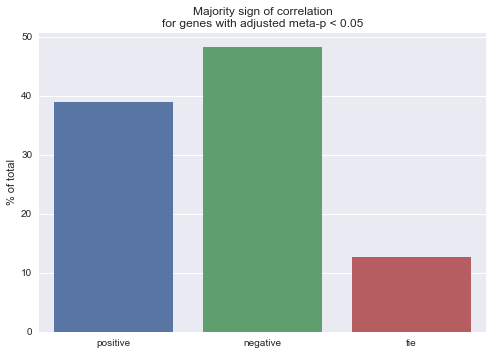

In [106]:
plt.show()

In [141]:
significant_count.value_counts().sort_index()

0     976
1    1061
2    1114
3     831
4     776
5     983
6     786
dtype: int64

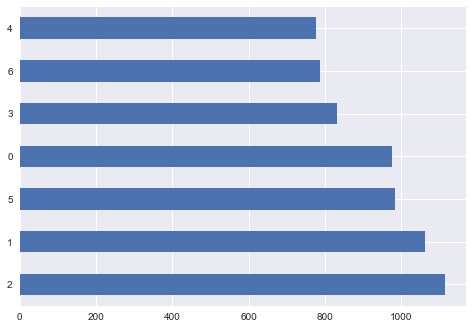

In [120]:
plt.show()